# DESAFIO - ANALISTA DE DADOS JR - EDUCAR GAMES
[Matheus Pinto Araujo](https://www.linkedin.com/in/matheus-p-araujo/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings;   warnings.filterwarnings("ignore")

In [2]:
usuarios = pd.read_excel('./Bases/usuarios.xlsx')
print(f'Nessa base há {usuarios.shape[0]} linhas dividas em {usuarios.shape[1]} colunas.')
print(f'Há {usuarios.isna().sum().sum()} linhas em branco e '
      f'{usuarios.duplicated().sum()} lihas duplicadas nessa base.')
usuarios.head()

Nessa base há 10 linhas dividas em 4 colunas.
Há 0 linhas em branco e 0 lihas duplicadas nessa base.


,id_usuario,nome,tipo_usuario,id_escola
0,1,João Silva,Aluno,101
1,2,Maria Santos,Professor,101
2,3,Ana Costa,Aluno,102
3,4,Pedro Souza,Professor,102
4,5,Lucas Almeida,Aluno,103


In [3]:
escolas = pd.read_excel('./Bases/escolas.xlsx')
print(f'Nessa base há {escolas.shape[0]} linhas dividas em {escolas.shape[1]} colunas.')
print(f'Há {escolas.isna().sum().sum()} linhas em branco e '
      f'{escolas.duplicated().sum()} lihas duplicadas nessa base.')
escolas.head()

Nessa base há 4 linhas dividas em 2 colunas.
Há 0 linhas em branco e 0 lihas duplicadas nessa base.


,id_escola,nome_escola
0,101,Escola ABC
1,102,Escola XYZ
2,103,Escola do Futuro
3,104,Escola Criativa


In [4]:
aula_plataforma = pd.read_excel('./Bases/aula_plataforma.xlsx')
print(f'Nessa base há {aula_plataforma.shape[0]} linhas dividas em {aula_plataforma.shape[1]} colunas.')
print(f'Há {aula_plataforma.isna().sum().sum()} linhas em branco e '
      f'{aula_plataforma.duplicated().sum()} lihas duplicadas nessa base.')
aula_plataforma.head()

Nessa base há 10 linhas dividas em 5 colunas.
Há 0 linhas em branco e 0 lihas duplicadas nessa base.


,id_aula,id_professor,data_criacao,data_conclusao,id_aluno
0,1001,2,2024-11-01,2024-11-02,1
1,1002,4,2024-11-01,2024-11-03,3
2,1003,2,2024-11-02,2024-11-04,6
3,1004,4,2024-11-03,2024-11-04,3
4,1005,9,2024-11-04,2024-11-05,8


In [5]:
acesso_plataforma = pd.read_excel('./Bases/acesso_plataforma.xlsx')
print(f'Nessa base há {acesso_plataforma.shape[0]} linhas dividas em {acesso_plataforma.shape[1]} colunas.')
print(f'Há {acesso_plataforma.isna().sum().sum()} linhas em branco e '
      f'{acesso_plataforma.duplicated().sum()} lihas duplicadas nessa base.')
acesso_plataforma.head()

Nessa base há 48 linhas dividas em 4 colunas.
Há 0 linhas em branco e 0 lihas duplicadas nessa base.


,Data_acesso,id_usuario,tipo_usuario,id_escola
0,2024-11-01,1,Aluno,101
1,2024-11-01,2,Professor,101
2,2024-11-02,3,Aluno,102
3,2024-11-02,4,Professor,102
4,2024-11-03,5,Aluno,103


# Problemas a Resolver

## 1. Quantificar o número total de alunos ativos no período analisado.


In [6]:
#Filtrar apenas os alunos
alunos_ativos = usuarios[usuarios['tipo_usuario'] == 'Aluno']
print(f'Total de {alunos_ativos.shape[0]} alunos ativos.')
alunos_ativos

Total de 5 alunos ativos.


,id_usuario,nome,tipo_usuario,id_escola
0,1,João Silva,Aluno,101
2,3,Ana Costa,Aluno,102
4,5,Lucas Almeida,Aluno,103
5,6,Julia Ferreira,Aluno,104
7,8,Clara Oliveira,Aluno,104


## 2.Identificar o professor e aluno que mais:
### - Criou aulas no jogo.

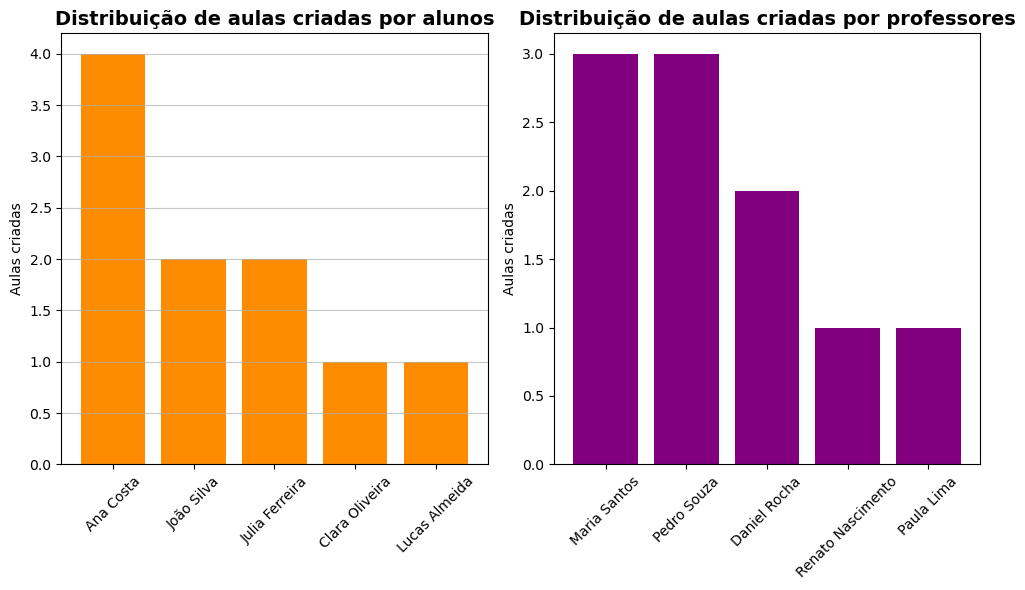

In [7]:
# Contagens de id_aluno e id_professor e trocando os id pelos nomes
aulas_alunos = aula_plataforma['id_aluno'].value_counts().rename(index=usuarios.set_index('id_usuario')['nome'])
aulas_professor = aula_plataforma['id_professor'].value_counts().rename(index=usuarios.set_index('id_usuario')['nome'])

# Criar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Gráfico para id_aluno
axes[0].bar(aulas_alunos.index, aulas_alunos.values, color='#ff8c00')
axes[0].set_title('Distribuição de aulas criadas por alunos', fontsize=14, weight='bold')
axes[0].set_ylabel('Aulas criadas')
axes[0].set_xticklabels(aulas_alunos.index, rotation=45)
axes[0].grid(axis='y', linestyle='-', alpha=0.7)

# Gráfico para id_professor
axes[1].bar(aulas_professor.index, aulas_professor.values, color='purple')
axes[1].set_title('Distribuição de aulas criadas por professores', fontsize=14, weight='bold')
axes[1].set_ylabel('Aulas criadas')
axes[1].set_xticklabels(aulas_professor.index, rotation=45)

plt.tight_layout()
plt.savefig('./Gráficos/Distribuição de criação de aulas')
plt.show()

In [8]:
# Juntar as informações dos alunos
aulas_criadas = aula_plataforma.merge(
    usuarios[['id_usuario', 'nome', 'id_escola']],left_on='id_aluno', right_on='id_usuario',
    how='left', suffixes=('', '_aluno')).rename(columns={'nome': 'nome_aluno', 'id_escola': 'id_escola_aluno'})

# Juntar as informações dos professores
aulas_criadas = aulas_criadas.merge(
    usuarios[['id_usuario', 'nome', 'id_escola']], left_on='id_professor', right_on='id_usuario',
    how='left', suffixes=('', '_professor')).rename(columns={'nome': 'nome_professor', 'id_escola': 'id_escola_professor'})

# Organizando DF
aulas_criadas = aulas_criadas.drop(columns=['id_usuario', 'id_usuario_professor'])
colunas = list(aulas_criadas.columns)
colunas.insert(colunas.index('id_professor') + 1, colunas.pop(colunas.index('nome_professor')))
aulas_criadas = aulas_criadas[colunas]

aulas_criadas.to_excel('./Bases/aulas_criadas.xlsx', index=False)
aulas_criadas.head()

,id_aula,id_professor,nome_professor,data_criacao,data_conclusao,id_aluno,nome_aluno,id_escola_aluno,id_escola_professor
0,1001,2,Maria Santos,2024-11-01,2024-11-02,1,João Silva,101,101
1,1002,4,Pedro Souza,2024-11-01,2024-11-03,3,Ana Costa,102,102
2,1003,2,Maria Santos,2024-11-02,2024-11-04,6,Julia Ferreira,104,101
3,1004,4,Pedro Souza,2024-11-03,2024-11-04,3,Ana Costa,102,102
4,1005,9,Daniel Rocha,2024-11-04,2024-11-05,8,Clara Oliveira,104,104


In [9]:
# Ranquear top 3 alunos e professores
top_alunos = aulas_criadas['id_aluno'].value_counts().head(3)
nomes_alunos = [aulas_criadas[aulas_criadas['id_aluno'] == aluno_id]['nome_aluno'].iloc[0] for aluno_id in top_alunos.index]
quantidades_alunos = top_alunos.values

top_professores = aulas_criadas['id_professor'].value_counts().head(3)
nomes_professores = [aulas_criadas[aulas_criadas['id_professor'] == professor_id]['nome_professor'].iloc[0] for professor_id in top_professores.index]
quantidades_professores = top_professores.values

print('TOP 3:')
for i in range(3):
    print(f"{i + 1}°")
    print(f"Aluno: {nomes_alunos[i]} ({quantidades_alunos[i]} aulas)")
    print(f"Professor: {nomes_professores[i]} ({quantidades_professores[i]} aulas)")
    print('-----'*8)

TOP 3:
1°
Aluno: Ana Costa (4 aulas)
Professor: Maria Santos (3 aulas)
----------------------------------------
2°
Aluno: João Silva (2 aulas)
Professor: Pedro Souza (3 aulas)
----------------------------------------
3°
Aluno: Julia Ferreira (2 aulas)
Professor: Daniel Rocha (2 aulas)
----------------------------------------


### - Acessou a plataforma.

In [10]:
# Juntar as informações dos alunos
acessos = acesso_plataforma.merge(usuarios[['id_usuario', 'nome']], on='id_usuario', how='left')

acessos.head()

,Data_acesso,id_usuario,tipo_usuario,id_escola,nome
0,2024-11-01,1,Aluno,101,João Silva
1,2024-11-01,2,Professor,101,Maria Santos
2,2024-11-02,3,Aluno,102,Ana Costa
3,2024-11-02,4,Professor,102,Pedro Souza
4,2024-11-03,5,Aluno,103,Lucas Almeida


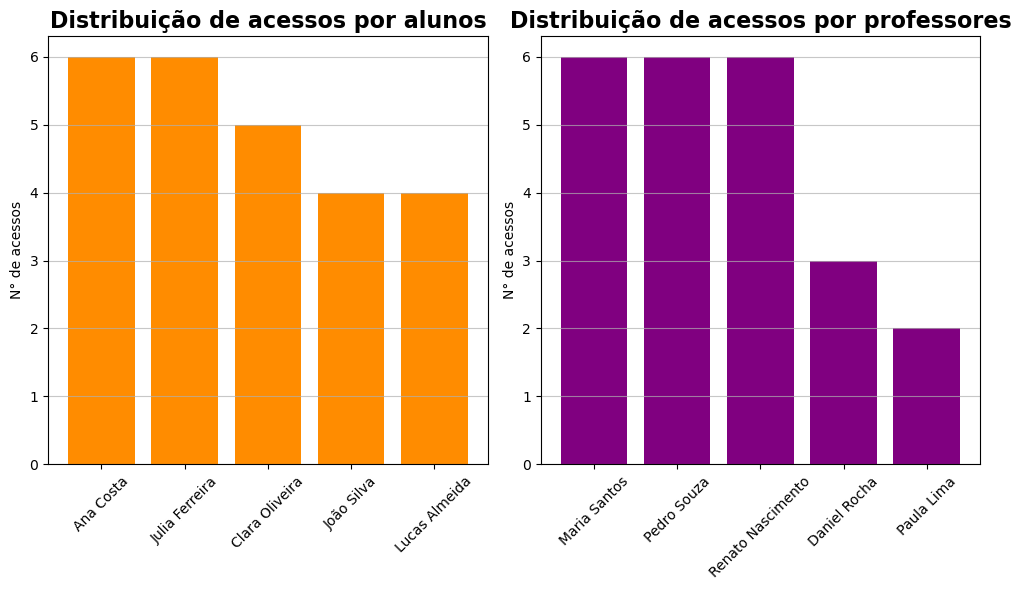

In [11]:
# Filtrar alunos e contar acessos por nome
acessos_alunos = acessos[acessos['tipo_usuario'] == 'Aluno']
contagem_alunos = acessos_alunos['nome'].value_counts().reset_index()

acessos_professores = acessos[acessos['tipo_usuario'] == 'Professor']
contagem_professores = acessos_professores['nome'].value_counts().reset_index()

# Criar gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Gráfico para id_aluno
axes[0].bar(contagem_alunos['nome'], contagem_alunos['count'], color='#ff8c00')
axes[0].set_title('Distribuição de acessos por alunos', fontsize=16, weight='bold')
axes[0].set_ylabel('N° de acessos')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='-', alpha=0.7)

# Gráfico para id_professor
axes[1].bar(contagem_professores['nome'], contagem_professores['count'], color='purple')
axes[1].set_title('Distribuição de acessos por professores', fontsize=16, weight='bold')
axes[1].set_ylabel('N° de acessos')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='-', alpha=0.7)


plt.tight_layout()
plt.savefig('./Gráficos/Distribuição de acessos')
plt.show()

In [12]:
# Ranquear top 3 alunos e professores
top_alunos = contagem_alunos.head(3).to_dict(orient='records')
top_professores = contagem_professores.head(3).to_dict(orient='records')

# Exibir resultados
print('TOP 3 Alunos:')
for i, aluno in enumerate(top_alunos, start=1):
    print(f"{i}° Nome: {aluno['nome']} - {aluno['count']} acessos")

print('\nTOP 3 Professores:')
for i, professor in enumerate(top_professores, start=1):
    print(f"{i}° Nome: {professor['nome']} - {professor['count']} acessos")

TOP 3 Alunos:
1° Nome: Ana Costa - 6 acessos
2° Nome: Julia Ferreira - 6 acessos
3° Nome: Clara Oliveira - 5 acessos

TOP 3 Professores:
1° Nome: Maria Santos - 6 acessos
2° Nome: Pedro Souza - 6 acessos
3° Nome: Renato Nascimento - 6 acessos


## 3.	Determinar a escola com o maior número de alunos ativos.  

In [13]:
# Filtra apenas os alunos ativos
alunos_escolas_ativos = acesso_plataforma[acesso_plataforma['tipo_usuario'] == 'Aluno']
# Agrupa por escola e conta o número de alunos únicos
alunos_por_escola = alunos_escolas_ativos.groupby('id_escola')['id_usuario'].nunique()
top_3_escolas = alunos_por_escola.nlargest(3)
top_3_nomes = escolas[escolas['id_escola'].isin(top_3_escolas.index)].set_index('id_escola')
top_3_nomes = top_3_nomes.loc[top_3_escolas.index]

print('Escolas com mais alunos ativos:')
for i, row in enumerate(top_3_nomes.itertuples(), start=1):
    print(f"{i}ª - {row.nome_escola} ({row.Index}) - {top_3_escolas[row.Index]} alunos")

Escolas com mais alunos ativos:
1ª - Escola Criativa (104) - 2 alunos
2ª - Escola ABC (101) - 1 alunos
3ª - Escola XYZ (102) - 1 alunos


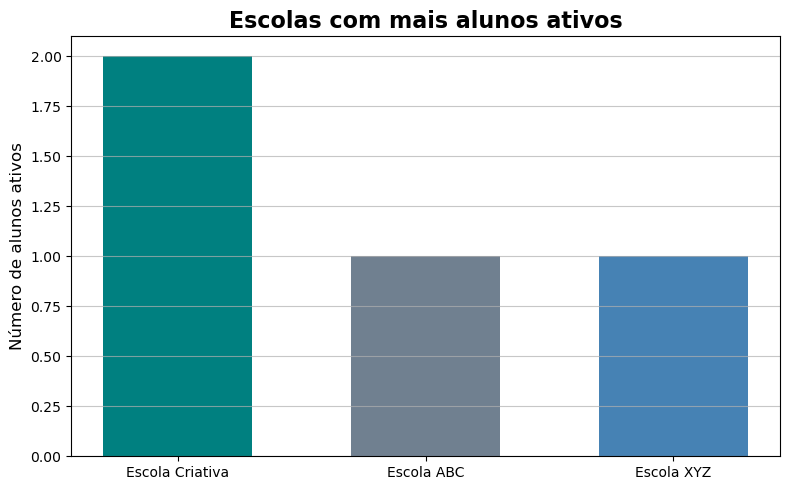

In [14]:
# Dados para o gráfico
escolas = top_3_nomes['nome_escola']
alunos = top_3_escolas.values

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(escolas, alunos, color=['#008080', '#708090', '#4682b4'], width=0.6)
plt.title('Escolas com mais alunos ativos', fontsize=16, weight='bold')
plt.ylabel('Número de alunos ativos', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()

plt.tight_layout()
plt.savefig('./Gráficos/Escolas com mais alunos ativos')
plt.show()

## 4.	Criar um ranking dos alunos que mais completaram aulas e das escolas com melhor desempenho.

### Ranking dos alunos que mais completaram aulas

In [15]:
# Ranking de alunos por aulas completadas
ranking_alunos = aula_plataforma['id_aluno'].value_counts().reset_index()
ranking_alunos.columns = ['id_aluno', 'aulas_completadas']
ranking_alunos = ranking_alunos.merge(usuarios[['id_usuario', 'nome']], left_on='id_aluno', right_on='id_usuario')
ranking_alunos.to_excel('./Bases/ranking_alunos.xlsx', index=False)
print("Arquivo salvo com sucesso.")
print("Ranking de alunos que mais completaram aulas:")
ranking_alunos

Arquivo salvo com sucesso.
Ranking de alunos que mais completaram aulas:


,id_aluno,aulas_completadas,id_usuario,nome
0,3,4,3,Ana Costa
1,1,2,1,João Silva
2,6,2,6,Julia Ferreira
3,8,1,8,Clara Oliveira
4,5,1,5,Lucas Almeida


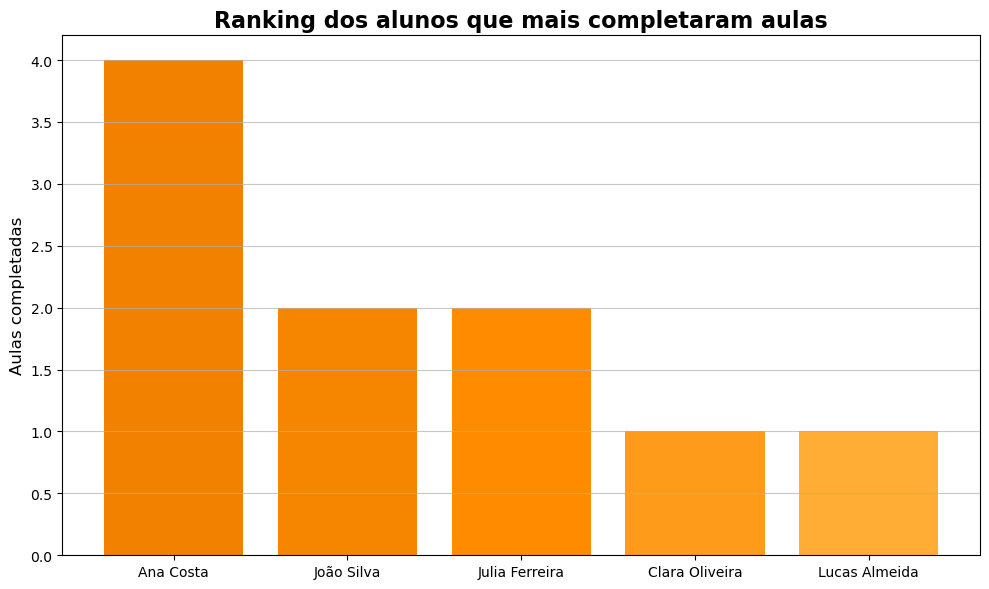

In [16]:
# Ranking por número de aulas completadas em ordem decrescente
ranking_alunos = ranking_alunos.sort_values(by='aulas_completadas', ascending=False)
cores = ['#f28100', '#f68500', '#ff8c00', '#ff9b1a', '#ffad34']
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ranking_alunos['nome'], ranking_alunos['aulas_completadas'], color=cores)
plt.title('Ranking dos alunos que mais completaram aulas', fontsize=16, weight='bold')
plt.ylabel('Aulas completadas', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.savefig('./Gráficos/Ranking dos alunos que mais completaram aulas')
plt.show()

### Escolas com melhor desempenho:
#### Escolas com mais aulas criadas

In [17]:
# Ranking das escolas por número de aulas criadas
aulas_criadas_por_escola = aula_plataforma.merge(usuarios, left_on='id_professor', right_on='id_usuario')\
    .groupby('id_escola').size().reset_index(name='aulas_criadas')
ranking_aulas = aulas_criadas_por_escola.merge(escolas, on='id_escola').sort_values(by='aulas_criadas', ascending=False)
ranking_aulas

,id_escola,aulas_criadas,nome_escola
1,102,4,Escola XYZ
0,101,3,Escola ABC
2,104,2,Escola Criativa


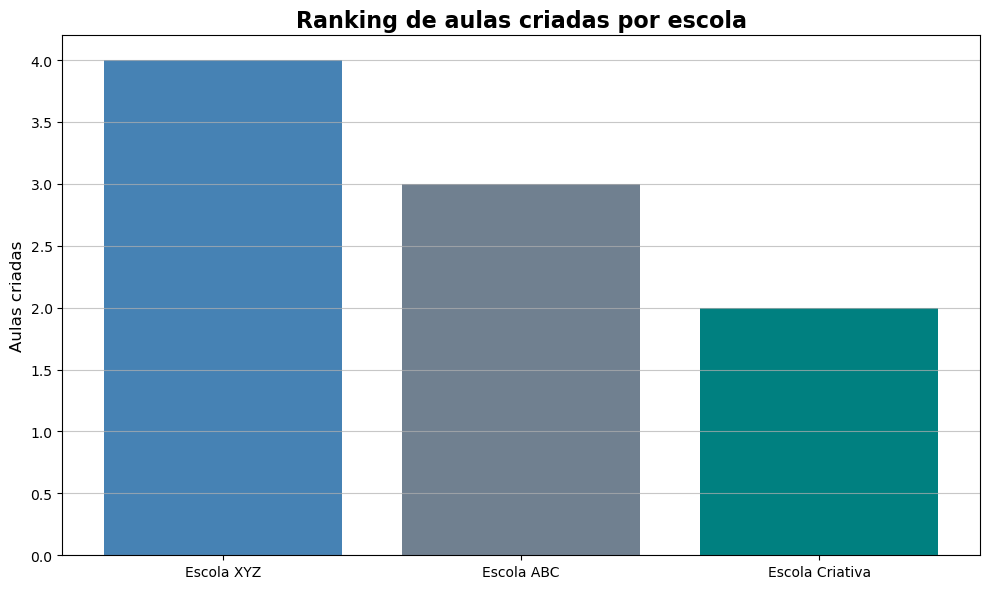

In [18]:
# Ranking por número de aulas completadas em ordem decrescente
cores = ['#4682b4', '#708090', '#008080']
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ranking_aulas['nome_escola'], ranking_aulas['aulas_criadas'], color=cores)
plt.title('Ranking de aulas criadas por escola', fontsize=16, weight='bold')
plt.ylabel('Aulas criadas', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.savefig('./Gráficos/Ranking de aulas criadas por escola')
plt.show()

#### Escolas com mais acessos

In [19]:
# Ranking das escolas por número de acessos
acessos_por_escola = acesso_plataforma.groupby('id_escola').size().reset_index(name='acessos')
ranking_acessos = acessos_por_escola.merge(escolas, on='id_escola').sort_values(by='acessos', ascending=False)
ranking_acessos

,id_escola,acessos,nome_escola
1,102,14,Escola XYZ
2,104,14,Escola Criativa
0,101,10,Escola ABC


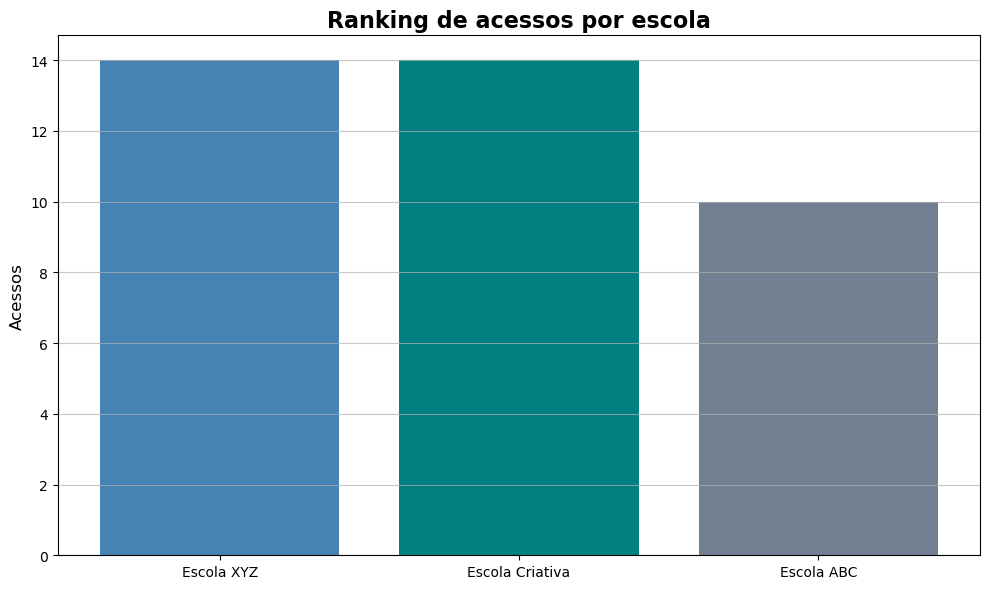

In [20]:
# Ranking por número de aulas completadas em ordem decrescente
cores = ['#4682b4', '#008080', '#708090']
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(ranking_acessos['nome_escola'], ranking_acessos['acessos'], color=cores)
plt.title('Ranking de acessos por escola', fontsize=16, weight='bold')
plt.ylabel('Acessos', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.savefig('./Gráficos/Ranking de acessos por escola')
plt.show()

### Aulas criadas e concluídas ao longo do tempo

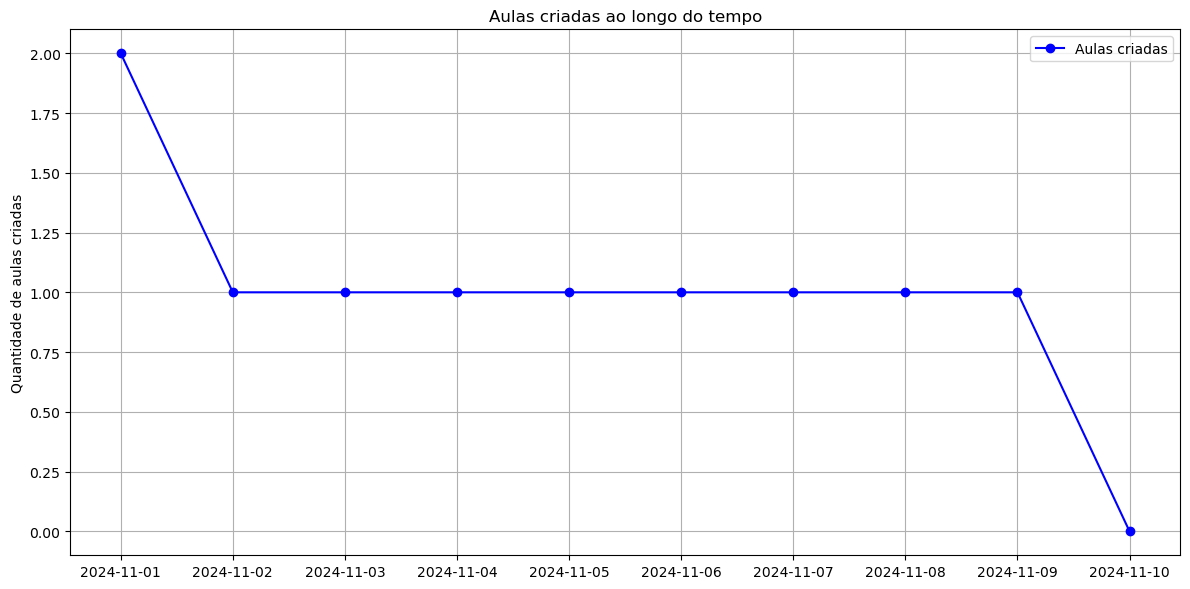

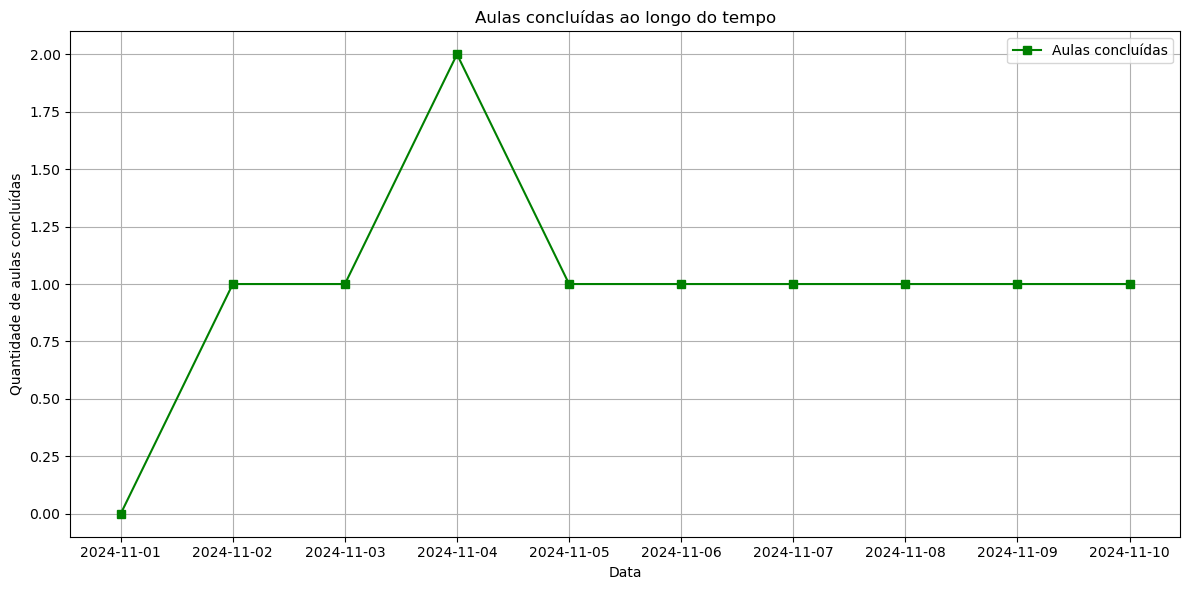

In [21]:
# Contar a quantidade de aulas criadas e concluídas por data
criadas_count = aula_plataforma["data_criacao"].value_counts().sort_index()
concluidas_count = aula_plataforma["data_conclusao"].value_counts().sort_index()

# Garantir que os períodos cubram o mesmo intervalo de datas
datas = pd.date_range(start=min(criadas_count.index.min(), concluidas_count.index.min()),
                           end=max(criadas_count.index.max(), concluidas_count.index.max()))
criadas_count = criadas_count.reindex(datas, fill_value=0)
concluidas_count = concluidas_count.reindex(datas, fill_value=0)

# Gráfico de Aulas Criadas
plt.figure(figsize=(12, 6))
plt.plot(criadas_count.index, criadas_count.values, label="Aulas criadas", marker='o', color='blue')
plt.title("Aulas criadas ao longo do tempo")
plt.ylabel("Quantidade de aulas criadas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('./Gráficos/Aulas criadas ao longo do tempo')
plt.show()

# Gráfico de Aulas Concluídas
plt.figure(figsize=(12, 6))
plt.plot(concluidas_count.index, concluidas_count.values, label="Aulas concluídas", marker='s', color='green')
plt.title("Aulas concluídas ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade de aulas concluídas")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('./Gráficos/Aulas concluídas ao longo do tempo')
plt.show()

### Número de acessos ao longo do tempo

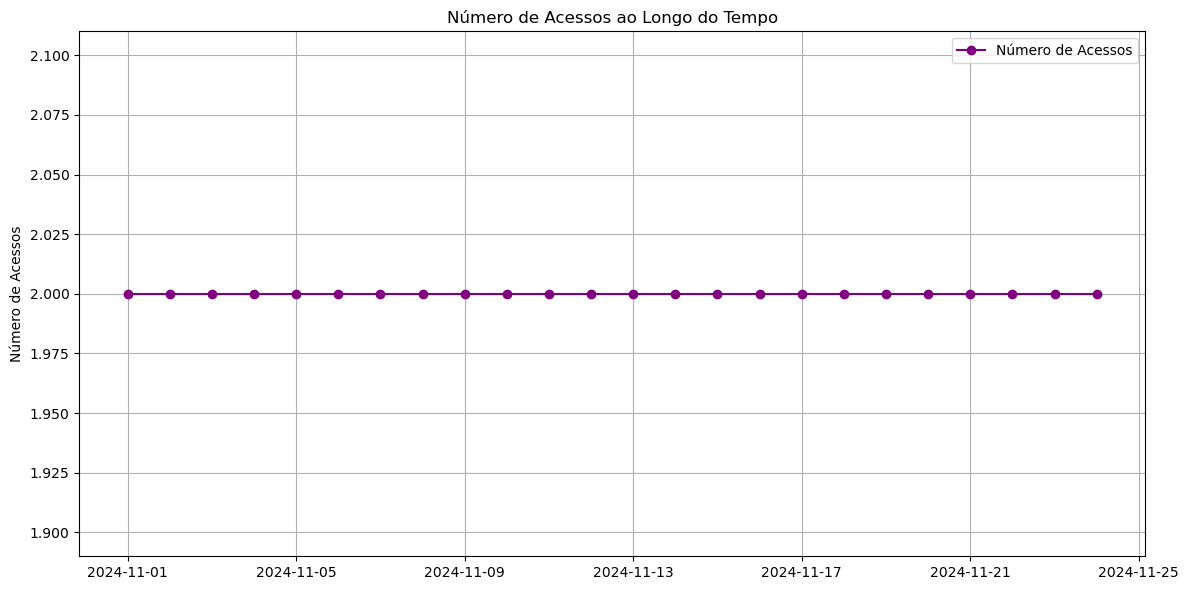

In [22]:
# Contar o número de acessos por data
acessos_counts = acessos["Data_acesso"].value_counts().sort_index()

# Garantir que o gráfico cobre o intervalo de datas completo
date_range = pd.date_range(start=acessos_counts.index.min(), end=acessos_counts.index.max())
acessos_counts = acessos_counts.reindex(date_range, fill_value=0)

# Criar o gráfico de número de acessos ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(acessos_counts.index, acessos_counts.values, label="Número de Acessos", color='purple', marker='o')
plt.title("Número de Acessos ao Longo do Tempo")
plt.ylabel("Número de Acessos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Relação entre aulas criadas e concluídas

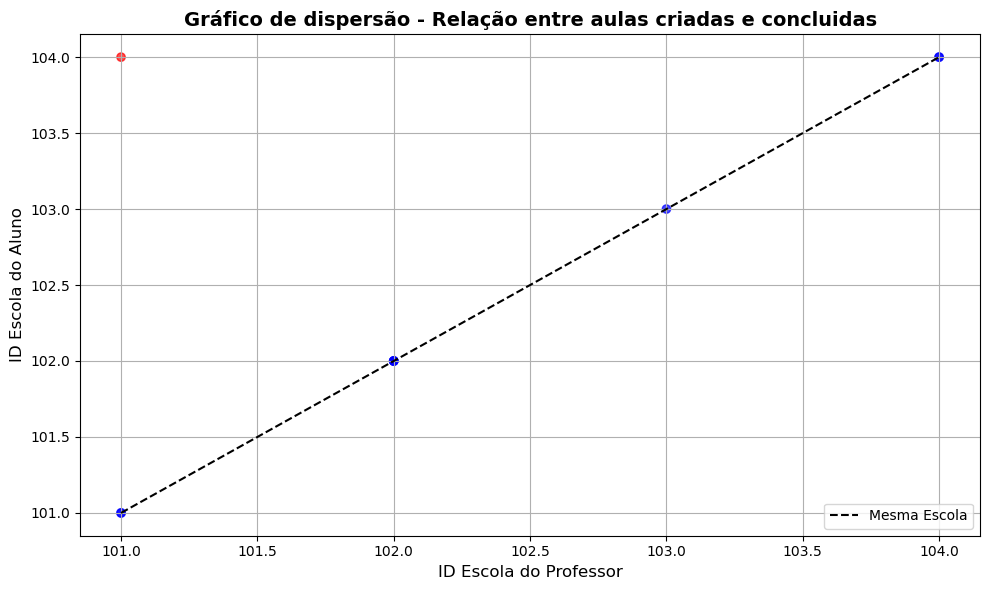

In [23]:
# Verificar se os IDs de escola do professores batem com o de alunos
aulas_criadas['mesma_escola'] = aulas_criadas['id_escola_aluno'] == aulas_criadas['id_escola_professor']

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
cores = ['blue' if x else 'red' for x in aulas_criadas['mesma_escola']]
plt.scatter(aulas_criadas['id_escola_professor'], aulas_criadas['id_escola_aluno'], c=cores, alpha=0.7)
plt.plot([aulas_criadas['id_escola_professor'].min(), aulas_criadas['id_escola_professor'].max()],
         [aulas_criadas['id_escola_aluno'].min(), aulas_criadas['id_escola_aluno'].max()],
         color='black', linestyle='--', label='Mesma Escola')
plt.title("Gráfico de dispersão - Relação entre aulas criadas e concluidas", fontsize=14, weight='bold')
plt.xlabel("ID Escola do Professor", fontsize=12)
plt.ylabel("ID Escola do Aluno", fontsize=12)

# Adicionando uma legenda
plt.legend()

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.savefig('./Gráficos/Gráfico dispersão - Relação entre aulas criadas e concluidas')
plt.show()

# Insights
- Como temos dados apenas do mês 11, notamos um padrão nos acessos à plataforma ao longo do mês, com dois acessos diários: um de aluno e um de professor, o que sugere que o professor disponibiliza uma atividade e o aluno a realiza no mesmo dia.

- A aluna Ana Costa se destacou, liderando os rankings de mais aulas criadas (4), concluidas (4) e de acessos à plataforma (6).

- Os professores que mais se destacaram foram Maria Santos e Pedro Souza, ambos com 3 aulas criadas e 6 acessos à plataforma.

- Embora a Escola Criativa tenha o maior número de alunos ativos, ela não é a escola com o maior número de aulas criadas. 

- Notei um caso atípico no gráfico de dispersão, em que há o registro de uma aula criada por um professor da Escola 101 e concluída por um aluno da Escola 104. Com base nessas informações, criei algumas hipóteses:

    - 1° - O aluno poderia ter pertencido à Escola 101 e realizado a aula enquanto estava lá, mas o sistema puxa os dados atuais e gera esse erro.
    - 2° - O professor pode ter tornado a aula como template, e outros professores de diferentes escolas a utilizam.
    - 3° - Por último, pode ser uma falha do sistema, permitindo que o aluno tenha acesso a aulas de professores de outras escolas.